In [1]:
import pandas as pd

df = pd.read_csv (r'/Users/sunqiaoyubing/Downloads/CC_Fraud.csv')
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [2]:
# Imports

import glob
import string
import ast

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

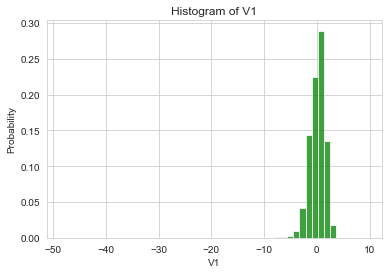

In [15]:
import matplotlib.pyplot as plt


# the histogram of the data
n, bins, patches = plt.hist(df.V3, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('V1')
plt.ylabel('Probability')
plt.title('Histogram of V1')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


<AxesSubplot:>

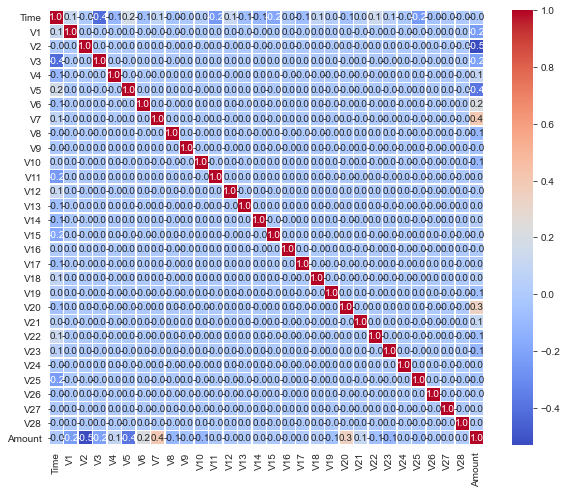

In [6]:
X_1 = df.drop(['Class'], axis=1)
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X_1.corr(), cmap='coolwarm', annot=True, linewidths=.5, fmt= '.1f',ax =ax,square=True)

#,'Time','Amount'

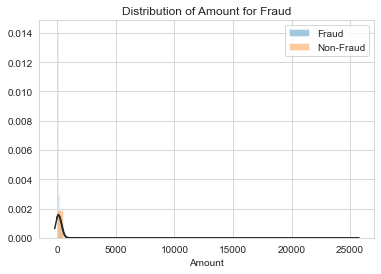

In [24]:
df1 = df[['Amount','Class']]
Class_ = df1[(df1['Class']==1)]
NonClass_ = df1[(df1['Class']==0)]
from scipy.stats import norm
ax1 = sns.distplot(Class_['Amount'], fit=norm, kde=False,label="Fraud")
ax2 = sns.distplot(NonClass_['Amount'], fit=norm, kde=False,label="Non-Fraud")
plt.title('Distribution of Amount for Fraud')
plt.legend()

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


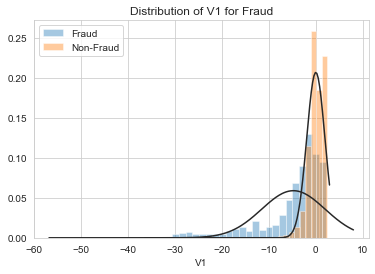

In [7]:
df1 = df[['V1','Class']]
Class_ = df1[(df1['Class']==1)]
NonClass_ = df1[(df1['Class']==0)]
from scipy.stats import norm
ax1 = sns.distplot(Class_['V1'], fit=norm, kde=False,label="Fraud")
ax2 = sns.distplot(NonClass_['V1'], fit=norm, kde=False,label="Non-Fraud")
plt.title('Distribution of V1 for Fraud')
plt.legend()

In [8]:
## 1. All data split
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
Train, Test = train_test_split(df, test_size=0.2, random_state=25)
Train.shape, Test.shape

((227845, 31), (56962, 31))

In [5]:
ValidSet, test_all = train_test_split(Test, test_size=0.7, random_state=25)
ValidSet.shape, test_all.shape

((17088, 31), (39874, 31))

In [7]:
xset = Train
X_all = xset.drop(['Class'], axis=1)
y_all = xset['Class']

Optimal number of features : 11


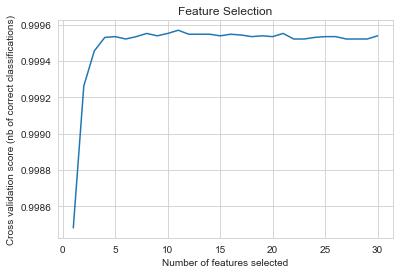

In [8]:
# Create the RFE object and compute a cross-validated score.
model = ExtraTreesClassifier()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(20),scoring='accuracy')
rfecv.fit(X_all, y_all)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title('Feature Selection')
plt.show()

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_all, y_all)

#Add features and their importances to a dictionary
feature_imp_dict = dict(zip(X_all.columns.values, model.feature_importances_))

for x in sorted(zip(model.feature_importances_,list(X_all)))[::-1]:
    print (x)

(0.1276847904370534, 'V14')
(0.12401183952478705, 'V12')
(0.1197039053705318, 'V17')
(0.07608059685256532, 'V11')
(0.06846836746315188, 'V16')
(0.05853194919843064, 'V10')
(0.04249234366502698, 'V18')
(0.03364116693680217, 'V4')
(0.03219888874334975, 'V9')
(0.028192473561933887, 'V3')
(0.025123180541152403, 'V7')
(0.016664866174372298, 'Time')
(0.016193148936822797, 'V21')
(0.015919882701112716, 'V2')
(0.015356421464833356, 'V6')
(0.015184277459343943, 'V26')
(0.014562024324493933, 'V19')
(0.014336503904970432, 'V5')
(0.014190244996334707, 'V8')
(0.014020390827264338, 'V1')
(0.013913762726645077, 'V24')
(0.013862109712461547, 'V20')
(0.01362834961657575, 'V15')
(0.013389457928855403, 'V27')
(0.013311481138837424, 'Amount')
(0.012811654281414715, 'V13')
(0.012385027586270624, 'V22')
(0.012053154450189908, 'V28')
(0.01135311739441025, 'V25')
(0.01073462208000564, 'V23')


In [9]:
#define a function to print ROC curves. 
#It should take in only arrays/lists of predictions and outcomes
from sklearn.metrics import roc_curve, auc

def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

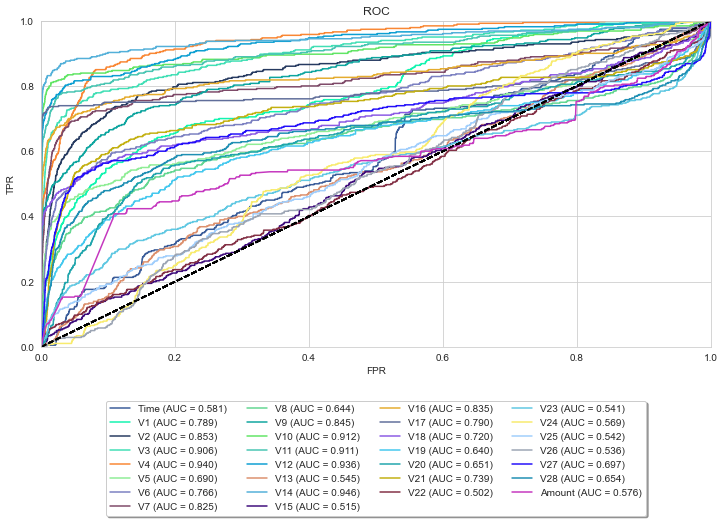

In [32]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#Plot the univariate AUC on the training data. Store the AUC

#Student put code here
feature_auc_dict = {}
for col in X_all.columns:
    feature_auc_dict[col] = plotUnivariateROC(X_all[col], y_all, col)


# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [33]:
#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict), columns = ['auc'])
df_imp = pd.DataFrame(pd.Series(feature_imp_dict), columns = ['imp'])

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_imp, left_index = True, right_index = True)
feat_imp_df

,auc,imp
Time,0.580830,0.016157
V1,0.789076,0.012585
V2,0.852673,0.014440
V3,0.906232,0.034738
V4,0.940012,0.040633
V5,0.689767,0.013802
V6,0.766031,0.014143
V7,0.824672,0.028017
V8,0.643875,0.016170
V9,0.845249,0.035374


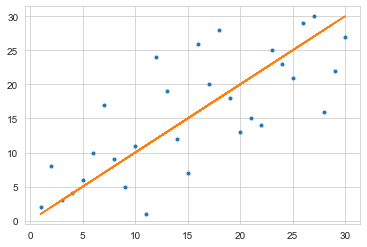

In [34]:
#Now create a df that holds the ranks of auc and mi 
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)

#Plot the two ranks
plt.plot(feat_ranks.auc, feat_ranks.imp, '.')
#Plot a y=x reference line
plt.plot(feat_ranks.auc, feat_ranks.auc,)

In [37]:
#Now create lists of top 10 features for both auc and mi
top10_auc = list(feat_ranks[(feat_ranks.auc <= 10)].index.values)
top10_imp = list(feat_ranks[(feat_ranks.imp <= 10)].index.values)
for x in zip(top10_auc, top10_imp):
    print (x)

('V2', 'V3')
('V3', 'V4')
('V4', 'V9')
('V7', 'V10')
('V9', 'V11')
('V10', 'V12')
('V11', 'V14')
('V12', 'V16')
('V14', 'V17')
('V16', 'V18')


In [ ]:
#Now create lists of top 5 features for both auc and mi
top5_auc = list(feat_ranks[(feat_ranks.auc <= 5)].index.values)
top5_imp = list(feat_ranks[(feat_ranks.imp <= 5)].index.values)
for x in zip(top5_auc, top5_imp):
    print (x)

In [11]:
xset = Train
X_all = xset.drop(['Class'], axis=1)
y_all = xset['Class']

feature1=['V2','V3','V4','V7','V9']
feature2=['V2','V3','V4','V7','V9','V10','V11','V12','V14','V16']
  
X_train = xset.drop(['Class'], axis=1)
y_train = xset['Class']
X_train1 = xset[feature1]
y_train1 = xset['Class']
X_test2 = Test[feature2]
y_test2 = Test['Class']

fs_m1 = StandardScaler().fit(X_train)
Xs_train = fs_m1.transform(X_train)
Xs_test = fs_m1.transform(X_test)

fs_m1 = StandardScaler().fit(X_train1)
Xs_train = fs_m1.transform(X_train1)
Xs_test = fs_m1.transform(X_test1)

fs_m1 = StandardScaler().fit(X_train2)
Xs_train = fs_m1.transform(X_train2)
Xs_test = fs_m1.transform(X_test2)

NameError: name 'y_test' is not defined

In [44]:
logistics regression 1
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.691478
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: -55.062    
Dependent Variable: Class            AIC:              315119.5978
Date:               2022-02-20 10:24 BIC:              315222.9620
No. Observations:   227845           Log-Likelihood:   -1.5755e+05
Df Model:           9                LL-Null:          -2810.3    
Df Residuals:       227835           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
V2         0.0167     0.0026     6.3826   0.0000    0.0116    0.0218
V3        -0.0333     0.0030   -11.0111   0.0

In [1]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

NameError: name 'np' is not defined

In [46]:
#logreg = LogisticRegression(penalty='l2')
logreg = LogisticRegression(penalty='l2',C=1.0)
logreg.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.92      0.60      0.72       112

    accuracy                           1.00     56962
   macro avg       0.96      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



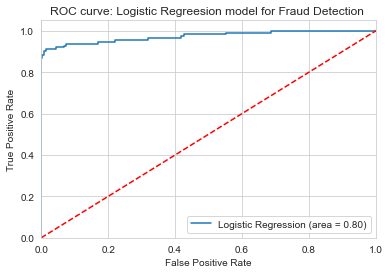

In [49]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: Logistic Regreesion model for Fraud Detection ')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
#Random forest model
rf_clf1 = RandomForestClassifier()

parameters = {'n_estimators': [10, 20, 25]}

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(rf_clf1, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_clf1 = grid_obj.best_estimator_

rf_clf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [55]:
rf_clf1_predictions = rf_clf1.predict(X_test)

NameError: name 'rf_clf' is not defined

In [57]:
conda env list

# conda environments:
#
base                  *  /Users/sunqiaoyubing/opt/anaconda3


Note: you may need to restart the kernel to use updated packages.


In [59]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=10)

In [ ]:
clf1.fit(X_train1, y_train1)